# **Modeling**

The problem is a classification problem with ordinal labels. We have the following possible values for the target variable: None, Low, Medium, High, Very High. We will first try some suitable models for ordinal classification:

1. **Ordinal Logistic Regression:**
   - **Type:** Supervised learning, ordinal classification.
   - **Strengths:** Designed specifically for ordinal outcomes, interpretable, and extends logistic regression to handle ordered categories.
   - **Considerations:** Assumes the proportional odds assumption.

2. **Random Forest Classifier for Ordinal Regression:**
   - **Type:** Supervised learning, classification.
   - **Strengths:** Handles non-linearity and interactions, robust to overfitting, and can handle ordinal targets by using the `OrdinalClassifier` from scikit-learn.
   - **Considerations:** Might not be as interpretable as ordinal logistic regression.

3. **Support Vector Machines (SVM) for Ordinal Classification:**
   - **Type:** Supervised learning, ordinal classification.
   - **Strengths:** Effective in high-dimensional spaces, versatile, and can be adapted for ordinal targets.
   - **Considerations:** Sensitive to the choice of kernel function and parameters.

4. **Ordinal Neural Networks:**
   - **Type:** Deep learning, ordinal classification.
   - **Strengths:** Can capture complex relationships, automatically learns feature representations, and can be adapted for ordinal outcomes.
   - **Considerations:** Requires more data, computationally intensive, and might be overkill for simpler problems.

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Importing the datasets
merged_df = pd.read_csv('datasets/merged.csv', na_filter=False, encoding = "latin")
test_merged_filled = pd.read_csv('datasets/test_merged_filled.csv', na_filter=False, encoding = "latin")

In [3]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Normal (kWh)                  11016 non-null  float64
 1   Economic (kWh)                11016 non-null  float64
 2   Self-consumption (kWh)        11016 non-null  float64
 3   Injection                     11016 non-null  object 
 4   temp                          11016 non-null  float64
 5   feels_like                    11016 non-null  float64
 6   temp_min                      11016 non-null  float64
 7   temp_max                      11016 non-null  float64
 8   pressure                      11016 non-null  int64  
 9   humidity                      11016 non-null  int64  
 10  wind_speed                    11016 non-null  float64
 11  rain_1h                       11016 non-null  float64
 12  clouds_all                    11016 non-null  int64  
 13  w

In [4]:
# Injection is the Target Variable
X = merged_df.drop(['Injection'], axis=1)
y = merged_df['Injection']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

print(X_train.isnull().sum())
print(y_train.isnull().sum())



X_train.shape, X_test.shape, y_train.shape, y_test.shape

Normal (kWh)                    0
Economic (kWh)                  0
Self-consumption (kWh)          0
temp                            0
feels_like                      0
temp_min                        0
temp_max                        0
pressure                        0
humidity                        0
wind_speed                      0
rain_1h                         0
clouds_all                      0
weather_broken clouds           0
weather_few clouds              0
weather_heavy intensity rain    0
weather_light rain              0
weather_moderate rain           0
weather_overcast clouds         0
weather_scattered clouds        0
weather_sky is clear            0
hour                            0
day_of_year                     0
rain_binary                     0
dtype: int64
0


((8262, 23), (2754, 23), (8262,), (2754,))

In [5]:
# Save every model and its accuracy in a dictionary
Results = {}

In [6]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [7]:
# Function to plot bar graph with model names and accuracies
def plot_accuracies_bar_graph(models, accuracies):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=models, y=accuracies, hue=models)
    plt.title('Model Accuracies')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.ylim(0.6, 1)  # Set y-axis limit to start from 0.6
    plt.show()


### **Logistic Regression**

Logistic Regression Accuracy: 0.8163


c:\Users\despacito\miniconda3\envs\python3.10\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


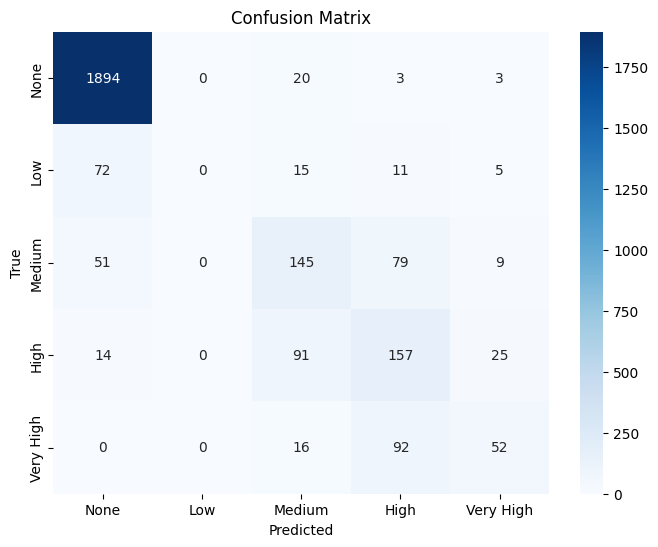

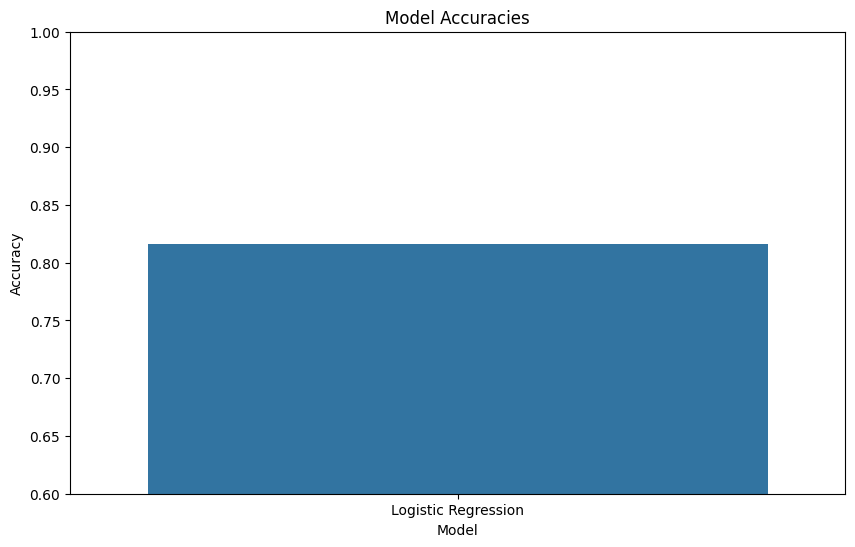

In [8]:
# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=0, max_iter=8000)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Calculate accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Print accuracy
print(f'Logistic Regression Accuracy: {accuracy_logreg:.4f}')

# Print confusion matrix
plot_confusion_matrix(y_test, y_pred_logreg, labels=['None', 'Low', 'Medium', 'High', 'Very High'])

# Save the model and its accuracy in the Results dictionary
Results['Logistic Regression'] = {'model': logreg_model, 'accuracy': accuracy_logreg}

models = list(Results.keys())
accuracies = [Results[model]['accuracy'] for model in models]
plot_accuracies_bar_graph(models, accuracies)

### **Logistic Regression Weighted**

{'None': 0.2821239542427864, 'Low': 5.022492401215805, 'Medium': 2.02997542997543, 'High': 2.025, 'Very High': 3.704932735426009}
Logistic Regression with Class Weights Accuracy: 0.7792


c:\Users\despacito\miniconda3\envs\python3.10\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


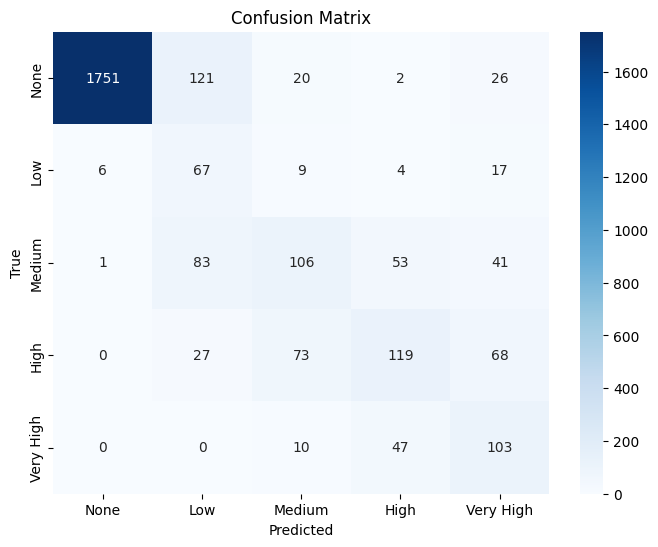

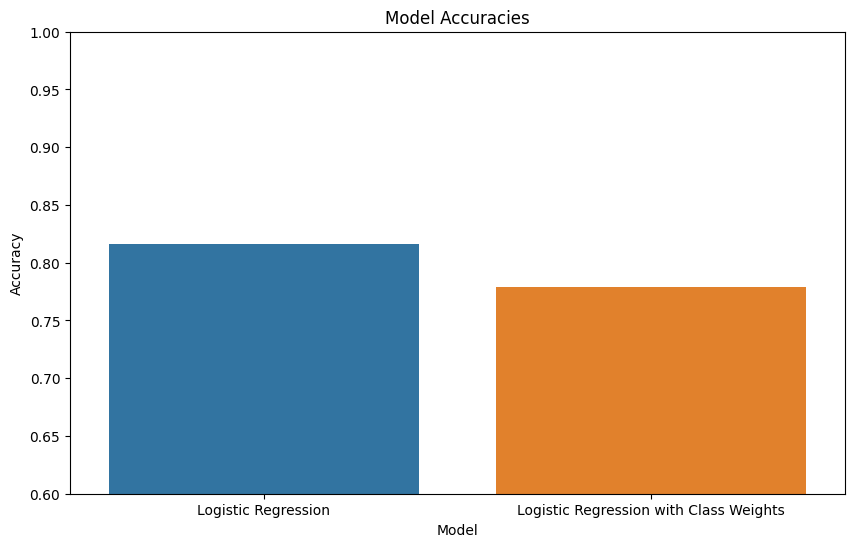

In [9]:
# Calculate class weights
class_weights = compute_class_weight('balanced', classes=['None', 'Low', 'Medium', 'High', 'Very High'], y=y_train)
class_weights = {label: weight for label, weight in zip(['None', 'Low', 'Medium', 'High', 'Very High'], class_weights)}

print(class_weights)

# Initialize another Logistic Regression model with class weights
logreg_model_class_weighted = LogisticRegression(random_state=0, max_iter=8000, class_weight=class_weights)

# Train the model
logreg_model_class_weighted.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg_class_weighted = logreg_model_class_weighted.predict(X_test)

# Calculate accuracy
accuracy_logreg_class_weighted = accuracy_score(y_test, y_pred_logreg_class_weighted)

# Print accuracy
print(f'Logistic Regression with Class Weights Accuracy: {accuracy_logreg_class_weighted:.4f}')

# Print confusion matrix
plot_confusion_matrix(y_test, y_pred_logreg_class_weighted, labels=['None', 'Low', 'Medium', 'High', 'Very High'])

# Save the model and its accuracy in the Results dictionary
Results['Logistic Regression with Class Weights'] = {'model': logreg_model_class_weighted, 'accuracy': accuracy_logreg_class_weighted}

# Update the list of models and accuracies
models = list(Results.keys())
accuracies = [Results[model]['accuracy'] for model in models]
plot_accuracies_bar_graph(models, accuracies)